In [9]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
from typing import List
import matplotlib.pyplot as plt
import numpy as np
import fdb
import loompy
import shoji
from tqdm import trange
import logging
import sys
#from rich.progress import track
%load_ext line_profiler
logging.basicConfig(stream=sys.stdout, format='%(asctime)s - %(levelname)s - %(message)s', level=20)

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [10]:
db = shoji.connect()
db

,Contents
images,"0 workspaces, 1 dimensions, 1 tensors"
refdb,"1 workspaces, 0 dimensions, 0 tensors"
scRNA,"0 workspaces, 2 dimensions, 3 tensors"
test,"0 workspaces, 2 dimensions, 42 tensors"


In [18]:
db.refdb.samples.S10X123_1

Workspace with 0 workspaces, 2 dimensions and 42 tensors:
  cells <Dimension of variable shape>
  genes <Dimension of shape 33538>
  Accession <Tensor Accession dtype='string' dims=('genes',), shape=(33538,)>
  Age <Tensor Age dtype='string' dims=(), shape=()>
  Ambiguous <Tensor Ambiguous dtype='uint16' dims=('cells', 'genes'), shape=(4847, 33538)>
  BpLength <Tensor BpLength dtype='int64' dims=(), shape=()>
  CDNAConc <Tensor CDNAConc dtype='float64' dims=(), shape=()>
  CellConc <Tensor CellConc dtype='int64' dims=(), shape=()>
  CellID <Tensor CellID dtype='string' dims=('cells',), shape=(4847,)>
  Chemistry <Tensor Chemistry dtype='string' dims=(), shape=()>
  Chromosome <Tensor Chromosome dtype='string' dims=('genes',), shape=(33538,)>
  Clusters <Tensor Clusters dtype='int64' dims=('cells',), shape=(4847,)>
  Comment <Tensor Comment dtype='string' dims=(), shape=()>
  CreationDate <Tensor CreationDate dtype='string' dims=(), shape=()>
  Donor <Tensor Donor dtype='string' dims=(), shape=()>
  DoubletFinderFlag <Tensor DoubletFinderFlag dtype='int64' dims=('cells',), shape=(4847,)>
  DoubletFinderScore <Tensor DoubletFinderScore dtype='float64' dims=('cells',), shape=(4847,)>
  End <Tensor End dtype='int64' dims=('genes',), shape=(33538,)>
  Expression <Tensor Expression dtype='float32' dims=('cells', 'genes'), shape=(4847, 33538)>
  FinalConc <Tensor FinalConc dtype='float64' dims=(), shape=()>
  Gene <Tensor Gene dtype='string' dims=('genes',), shape=(33538,)>
  LOOM_SPEC_VERSION <Tensor LOOM_SPEC_VERSION dtype='string' dims=(), shape=()>
  Last_modified <Tensor Last_modified dtype='string' dims=(), shape=()>
  MT_ratio <Tensor MT_ratio dtype='float64' dims=('cells',), shape=(4847,)>
  MeanTotalUMI <Tensor MeanTotalUMI dtype='float64' dims=(), shape=()>
  NGenes <Tensor NGenes dtype='float64' dims=('cells',), shape=(4847,)>
  PCA <Tensor PCA dtype='float32' dims=('cells', 50), shape=(4847, 50)>
  PCRCycles <Tensor PCRCycles dtype='int64' dims=(), shape=()>
  PassedQC <Tensor PassedQC dtype='uint8' dims=(), shape=()>
  RegionOfInterest <Tensor RegionOfInterest dtype='string' dims=(), shape=()>
  SampleName <Tensor SampleName dtype='string' dims=(), shape=()>
  Sex <Tensor Sex dtype='string' dims=(), shape=()>
  Species <Tensor Species dtype='string' dims=(), shape=()>
  Spliced <Tensor Spliced dtype='uint16' dims=('cells', 'genes'), shape=(4847, 33538)>
  Start <Tensor Start dtype='int64' dims=('genes',), shape=(33538,)>
  Strand <Tensor Strand dtype='string' dims=('genes',), shape=(33538,)>
  TSNE <Tensor TSNE dtype='float32' dims=('cells', 2), shape=(4847, 2)>
  TargetNumCells <Tensor TargetNumCells dtype='int64' dims=(), shape=()>
  Tissue <Tensor Tissue dtype='string' dims=(), shape=()>
  TotalUMI <Tensor TotalUMI dtype='float64' dims=('cells',), shape=(4847,)>
  Unspliced <Tensor Unspliced dtype='uint16' dims=('cells', 'genes'), shape=(4847, 33538)>
  Unspliced_ratio <Tensor Unspliced_ratio dtype='float64' dims=('cells',), shape=(4847,)>
  Velocyto.__version__ <Tensor Velocyto.__version__ dtype='string' dims=(), shape=()>
  Velocyto.logic <Tensor Velocyto.logic dtype='string' dims=(), shape=()>

In [3]:
if "test" in db:
    del db.test
db.test = shoji.Workspace()
db.test.cells = shoji.Dimension(shape=None)
db.test.Jagged = shoji.Tensor("uint16", ("cells", None, 10, None), [np.random.randint(0, 50, size=(x,10, x), dtype="uint16") for x in range(100)])
db.test.Age = shoji.Tensor("int32", ("cells",), np.arange(100, dtype="int32"))
db.test.Description = shoji.Tensor("string", (), "Hello")
#db.test.Age = shoji.Tensor("string", ("cells",), np.array(["Hej", "då"]*10000, dtype=object))
#data = np.random.randint(0, 50, size=(20000,100), dtype="int32")
#db.test.Shoes = shoji.Tensor("int32", ("cells",None), data[:20000])

In [3]:
db.test

Workspace with 0 workspaces, 1 dimensions and 3 tensors:
  cells <Dimension of variable shape>
  Age <Tensor Age dtype='int32' dims=('cells',), shape=(100,)>
  Description <Tensor Description dtype='string' dims=(), shape=()>
  Jagged <Tensor Jagged dtype='uint16' dims=('cells', None, 10, None), shape=(100, 0, 10, 0)>

In [13]:
# Top enriched cell types for a single gene
# Top enriched cell types for a small set of genes (less than 10)
# List of genes most enriched in a set of cell types
# List of genes most enriched in a set of cell types, relative to a different set of cell types


SyntaxError: invalid syntax (<ipython-input-13-6a1e464d352f>, line 3)

In [9]:
def _quick_look(self) -> str:
    if self.rank == 0:
        return self[:]

    def look(vals) -> str:
        s = "["
        if not isinstance(vals, list) and vals.ndim == 1:
            s += ", ".join(["{:,}".format(x) for x in vals[:5]])
        else:
            elms = []
            for val in vals[:5]:
                elms.append(look(val))
            s += ", ".join(elms)
        if len(vals) > 5:
            s += ", ...]"
        else:
            s += "]"
        return s

    return look(self[:5])

_quick_look(db.test.Jagged)

'[[], [[[48], [36], [32], [25], [46], ...]], [[[16, 35], [4, 8], [40, 23], [48, 0], [48, 26], ...], [[30, 11], [30, 47], [4, 33], [9, 30], [4, 40], ...]], [[[5, 46, 5], [38, 45, 49], [3, 5, 46], [8, 15, 2], [44, 48, 7], ...], [[11, 44, 42], [2, 31, 15], [32, 42, 46], [35, 6, 4], [38, 29, 9], ...], [[31, 42, 33], [44, 0, 43], [13, 16, 10], [46, 23, 1], [46, 21, 39], ...]], [[[43, 47, 16, 13], [10, 34, 46, 10], [19, 6, 25, 0], [16, 31, 5, 27], [36, 21, 16, 18], ...], [[40, 49, 4, 8], [18, 14, 35, 30], [48, 9, 2, 3], [42, 30, 12, 17], [47, 46, 9, 30], ...], [[19, 18, 4, 34], [16, 34, 41, 48], [19, 30, 11, 3], [33, 22, 10, 38], [38, 18, 8, 34], ...], [[39, 22, 25, 30], [10, 34, 38, 14], [19, 11, 22, 27], [28, 11, 21, 46], [39, 28, 22, 45], ...]]]'

In [ ]:
ws = db.test
#ws[ws.cells[:10] & (ws.Age == "Hej")].Age
ws[ws.cells[:10] & (ws.cells.Age < 5)].Jagged

In [5]:
if "scRNA" in db:
    del db.scRNA
if "images" in db:
    del db.images
if "mouse" in db:
    del db.mouse

In [6]:
db.images = shoji.Workspace()
db.images.cells = shoji.Dimension(shape=None)
db.images.Images = shoji.Tensor("uint16", ("cells", 2000, 2000))

In [9]:
db.images.cells.append({
    "Images": np.random.randint(0, 50, size=(1, 2000, 2000), dtype="uint16")
})

In [10]:
%%time
db.images

CPU times: user 1.83 ms, sys: 1.44 ms, total: 3.27 ms
Wall time: 3.23 ms


Workspace with 0 subspaces, 1 dimensions and 1 tensors:
  cells <Dimension of variable shape>
  Images <Tensor dtype='uint16' dims=('cells', 2000, 2000), shape=(3, 0, 0)>

In [3]:
del db.scRNA
db.scRNA = shoji.Workspace()
db.scRNA.cells = shoji.Dimension(shape=None)
db.scRNA.genes = shoji.Dimension(shape=5000)
db.scRNA.Expression = shoji.Tensor("int16", ("cells", "genes"))
db.scRNA.CellType = shoji.Tensor("string", ("cells",))
db.scRNA.Length = shoji.Tensor("uint16", ("genes",), inits=np.random.randint(0, 3000, size=5000, dtype="uint16"))
#db.scRNA.Chromosome = shoji.Tensor("string", ("genes",))

ws = db.scRNA
ws.cells.append({
	"CellType": np.array(["Neuron", "Astrocyte", "Neuron", "Microglia"]*1000, dtype=object),
	"Expression": np.random.randint(0, 10, size=(4000, 5000), dtype="uint16")
})




w [0 1 2 3 4] False [   0    1    2 ... 4997 4998 4999] (0,) 5000


In [4]:
ws = db.scRNA
ws.cells.append({
	"CellType": np.array(["Neuron", "Astrocyte", "Neuron", "Miroglia"]*1000, dtype=object),
	"Expression": np.random.randint(0, 10, size=(4000, 5000), dtype="uint16")
})


In [6]:
db.scRNA

[0]


Workspace with 0 workspaces, 2 dimensions and 3 tensors:
  cells <Dimension of variable shape>
  genes <Dimension of shape 5000>
  CellType <Tensor CellType dtype='string' dims=('cells',), shape=(8000,)>
  Expression <Tensor Expression dtype='int16' dims=('cells', 'genes'), shape=(8000, 5000)>
  Length <Tensor Length dtype='uint16' dims=('genes',), shape=(5000,)>

In [9]:
%%time
db.scRNA[::20].Expression.shape

CPU times: user 824 ms, sys: 127 ms, total: 951 ms
Wall time: 1.73 s


(8000, 5000)

In [7]:
v = db.scRNA[db.scRNA.cells[:1000] - (db.scRNA.Age > 10), db.scRNA.Length > 40]
v.Spliced.shape
#v.Age.shape

(182, 994)

In [3]:
fpool = "/Users/stelin/cytograph/20191003/data/dev_all.loom"
fagg = "/Users/stelin/cytograph/20191003/data/dev_all.agg.loom"

if "mouse" not in db:
    db.mouse = shoji.Workspace()

def from_loom(ws: shoji.WorkspaceManager, f: str, layers: List[str] = None) -> None:
    with loompy.connect(f, validate=False) as ds:
        if layers is None:
            layers = list(ds.layers.keys())
        ws.genes = shoji.Dimension(shape=None)
        ws.cells = shoji.Dimension(shape=None)

        STEP = 2000
        logging.info("Loading row attributes")
        for i in trange(0, ds.shape[0], STEP):
            d = {}
            for key, vals in ds.ra.items():
                dtype = vals.dtype.name
                name = key[0].upper() + key[1:]
                d[name] = ds.ra[key][i:i + STEP]
                if i == 0:
                    dims = ("genes", ) + (None,) * (vals.ndim - 1)
                    ws[name] = shoji.Tensor("string" if dtype == "object" else dtype, dims=dims)
            ws.genes.append(d)

        ws.genes = shoji.Dimension(shape=ds.shape[0])  # Set to a fixed shape to avoid jagged arrays below
        
        skipped = [x for x in ds.ca.keys() if x in ds.ra.keys()]
        for key, vals in ds.ca.items():
            dtype = ds.ca[key].dtype.name
            name = key[0].upper() + key[1:]
            dims = ("cells", ) + (None,) * (vals.ndim - 1)
            if name in skipped:
                logging.warning(f"Column attribute '{name}' skipped because a row attribute already exists with that name.")
                skipped.append(name)
            else:
                ws[name] = shoji.Tensor("string" if dtype == "object" else dtype, dims=dims)

        logging.info("Loading column attributes and matrix layers")
        STEP = 200
        for i in trange(0, ds.shape[1], STEP):
            d = {}
            for key in ds.ca.keys():
                name = key[0].upper() + key[1:]
                if name in skipped:
                    continue
                d[name] = ds.ca[key][i:i + STEP]
            for key in layers:
                if key not in ds.layers:
                    raise KeyError(f"Layer '{key}' not found")
                if key == "":
                    name = "Expression"
                else:
                    name = key[0].upper() + key[1:]
                dtype = ds.layers[key].dtype.name
                if i == 0:
                    ws[name] = shoji.Tensor("string" if dtype == "object" else dtype, ("cells", "genes"))
                d[name] = ds.layers[key][:, i:i + STEP].T
            ws.cells.append(d)

if "mouse" in db:
    del db.mouse
    db.mouse = shoji.Workspace()
    db.mouse.Development = shoji.Workspace()

from_loom(db.mouse.Development, fpool, layers=["spliced", "unspliced"])

2020-07-17 09:04:47,211 - INFO - Loading row attributes


100%|██████████| 16/16 [00:17<00:00,  1.07s/it]


2020-07-17 09:05:06,537 - WARNING - Column attribute 'HPF' skipped because a row attribute already exists with that name.
2020-07-17 09:05:11,216 - INFO - Loading column attributes and matrix layers


100%|██████████| 1463/1463 [54:41<00:00,  2.24s/it] 


In [12]:
db.refdb.samples.S10X104_1

Workspace with 0 workspaces, 2 dimensions and 42 tensors:
  cells <Dimension of variable shape>
  genes <Dimension of shape 33538>
  Accession <Tensor Accession dtype='string' dims=('genes',), shape=(33538,)>
  Age <Tensor Age dtype='string' dims=(), shape=()>
  Ambiguous <Tensor Ambiguous dtype='uint16' dims=('cells', 'genes'), shape=(5093, 33538)>
  BpLength <Tensor BpLength dtype='int64' dims=(), shape=()>
  CDNAConc <Tensor CDNAConc dtype='float64' dims=(), shape=()>
  CellConc <Tensor CellConc dtype='int64' dims=(), shape=()>
  CellID <Tensor CellID dtype='string' dims=('cells',), shape=(5093,)>
  Chemistry <Tensor Chemistry dtype='string' dims=(), shape=()>
  Chromosome <Tensor Chromosome dtype='string' dims=('genes',), shape=(33538,)>
  Clusters <Tensor Clusters dtype='int64' dims=('cells',), shape=(5093,)>
  Comment <Tensor Comment dtype='string' dims=(), shape=()>
  CreationDate <Tensor CreationDate dtype='string' dims=(), shape=()>
  Donor <Tensor Donor dtype='string' dims=(), shape=()>
  DoubletFinderFlag <Tensor DoubletFinderFlag dtype='int64' dims=('cells',), shape=(5093,)>
  DoubletFinderScore <Tensor DoubletFinderScore dtype='float64' dims=('cells',), shape=(5093,)>
  End <Tensor End dtype='int64' dims=('genes',), shape=(33538,)>
  Expression <Tensor Expression dtype='float32' dims=('cells', 'genes'), shape=(5093, 33538)>
  FinalConc <Tensor FinalConc dtype='float64' dims=(), shape=()>
  Gene <Tensor Gene dtype='string' dims=('genes',), shape=(33538,)>
  LOOM_SPEC_VERSION <Tensor LOOM_SPEC_VERSION dtype='string' dims=(), shape=()>
  Last_modified <Tensor Last_modified dtype='string' dims=(), shape=()>
  MT_ratio <Tensor MT_ratio dtype='float64' dims=('cells',), shape=(5093,)>
  MeanTotalUMI <Tensor MeanTotalUMI dtype='float64' dims=(), shape=()>
  NGenes <Tensor NGenes dtype='float64' dims=('cells',), shape=(5093,)>
  PCA <Tensor PCA dtype='float32' dims=('cells', None), shape=(5093, 50)>
  PCRCycles <Tensor PCRCycles dtype='int64' dims=(), shape=()>
  PassedQC <Tensor PassedQC dtype='uint8' dims=(), shape=()>
  RegionOfInterest <Tensor RegionOfInterest dtype='string' dims=(), shape=()>
  SampleName <Tensor SampleName dtype='string' dims=(), shape=()>
  Sex <Tensor Sex dtype='string' dims=(), shape=()>
  Species <Tensor Species dtype='string' dims=(), shape=()>
  Spliced <Tensor Spliced dtype='uint16' dims=('cells', 'genes'), shape=(5093, 33538)>
  Start <Tensor Start dtype='int64' dims=('genes',), shape=(33538,)>
  Strand <Tensor Strand dtype='string' dims=('genes',), shape=(33538,)>
  TSNE <Tensor TSNE dtype='float32' dims=('cells', None), shape=(5093, 2)>
  TargetNumCells <Tensor TargetNumCells dtype='int64' dims=(), shape=()>
  Tissue <Tensor Tissue dtype='string' dims=(), shape=()>
  TotalUMI <Tensor TotalUMI dtype='float64' dims=('cells',), shape=(5093,)>
  Unspliced <Tensor Unspliced dtype='uint16' dims=('cells', 'genes'), shape=(5093, 33538)>
  Unspliced_ratio <Tensor Unspliced_ratio dtype='float64' dims=('cells',), shape=(5093,)>
  Velocyto.__version__ <Tensor Velocyto.__version__ dtype='string' dims=(), shape=()>
  Velocyto.logic <Tensor Velocyto.logic dtype='string' dims=(), shape=()>

(-97.03581008911132, 80.55146560668945, -59.42253665924072, 74.7031114578247)

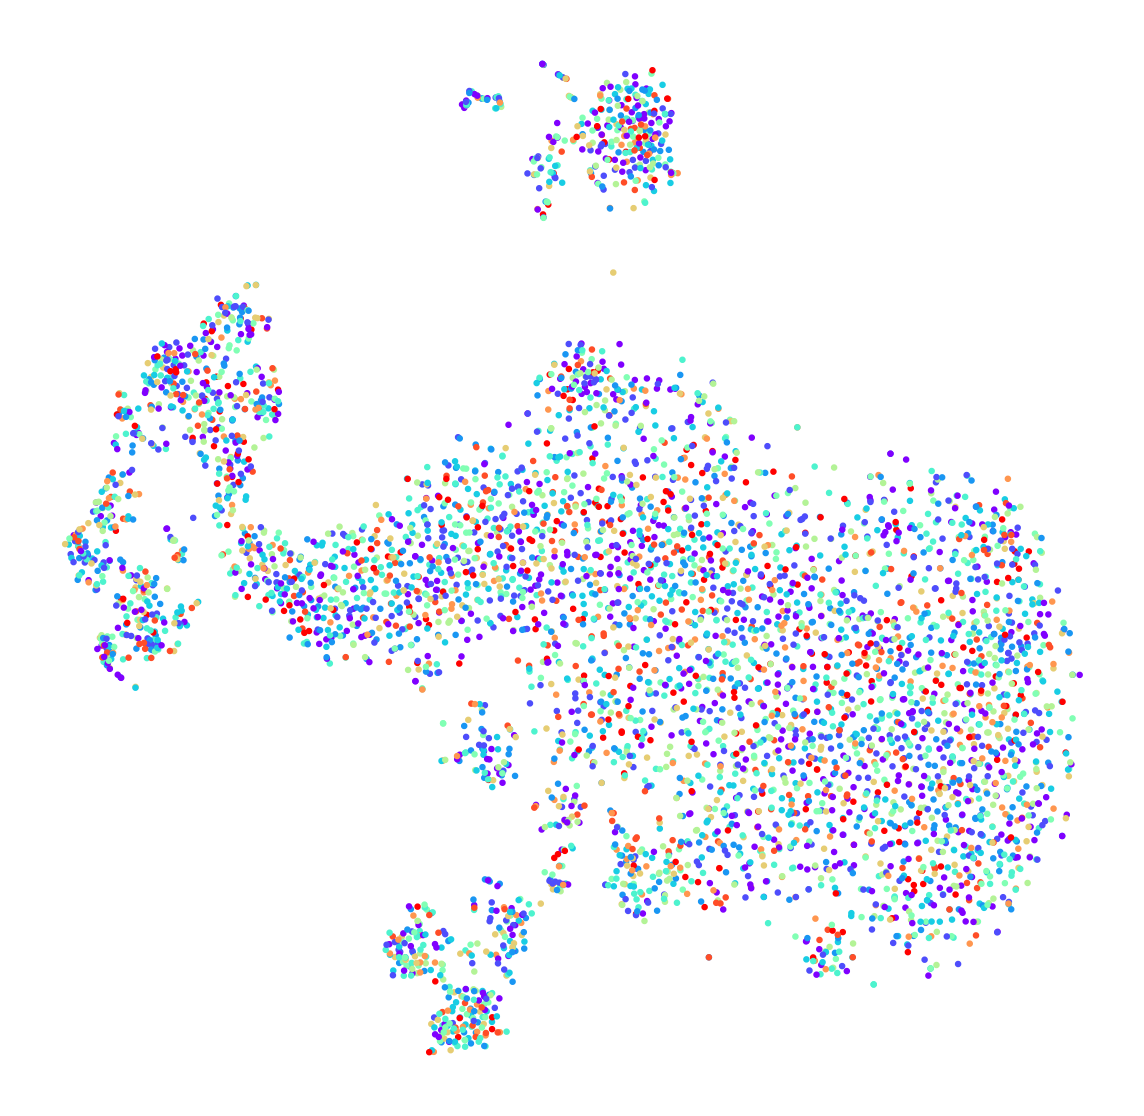

In [22]:
ws = db.refdb.samples.S10X104_1
xy = ws[:].TSNE
c = ws[:].Clusters
plt.figure(figsize=(10,10))
plt.scatter(xy[:,0], xy[:,1], c=c, cmap="rainbow", s=5)
plt.axis("off")

In [6]:
dev = db.mouse.Development
dev.genes = shoji.Dimension(shape=31053)

CPU times: user 60.9 ms, sys: 5.88 ms, total: 66.7 ms
Wall time: 82.7 ms


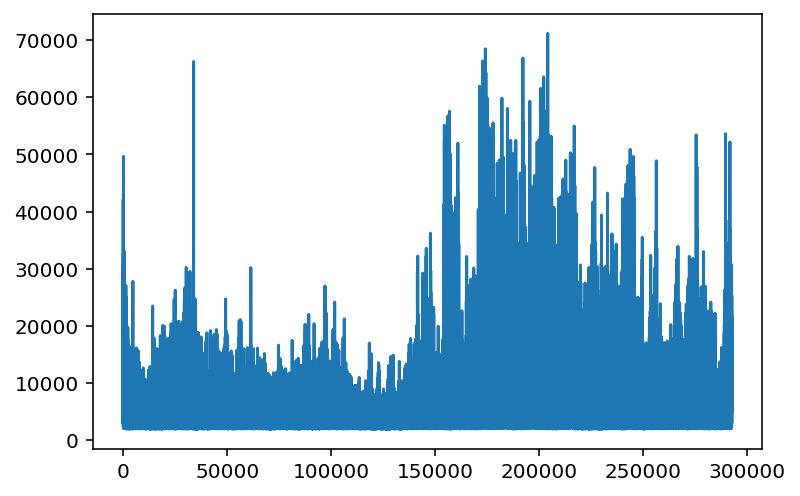

In [5]:
%%time
dev = db.mouse.Development
g=dev[:].TotalUMI
plt.plot(g)

In [23]:
%%time
dev[dev.cells[:8000]].Spliced
_

CPU times: user 876 ms, sys: 155 ms, total: 1.03 s
Wall time: 1.39 s


array([[ 2,  4, 17, ...,  1,  5,  0],
       [ 3,  0,  0, ...,  0,  0,  0],
       [ 1,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  1, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint16)

In [24]:
%%time
fpool = "/Users/stelin/cytograph/20191003/data/dev_all.loom"
with loompy.connect(fpool, validate=True) as ds:
    print(ds["spliced"][:, :8000])

[[ 2  4 17 ...  1  5  0]
 [ 3  0  0 ...  0  0  0]
 [ 1  0  0 ...  0  0  0]
 ...
 [ 0  0  1 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]
CPU times: user 1.44 s, sys: 134 ms, total: 1.57 s
Wall time: 1.57 s


In [28]:
from rich.console import Console
from rich.table import Table

table = Table()

table.add_column("Object", justify="right")
table.add_column("Name", justify="left")
table.add_column("dtype", justify="right")
table.add_column("dims", justify="right")
table.add_column("shape", justify="right")

#db.mouse.Development.Test = shoji.Workspace()
for x in db.mouse.Development:
    if isinstance(x, shoji.WorkspaceManager):
        table.add_row("Workspace", x.name, "", "", "")
    if isinstance(x, shoji.Dimension):
        table.add_row("Dimension", x.name, "", '{:,}'.format(x.shape) if x.shape is not None else "None", '{:,}'.format(x.length))
    if isinstance(x, shoji.Tensor):
        table.add_row("Tensor", x.name, x.dtype, " ✕ ".join([str(s) for s in x.dims]), " ✕ ".join(['{:,}'.format(s) for s in x.shape]))


console = Console(record=True)
console.print(table)

AttributeError: 'WorkspaceManager' object has no attribute 'name'

In [23]:
class Test:
    def __init__(self, wsm):
        self.wsm = wsm

    def _repr_html_(self):
        self = self.wsm
        if len(self._path) == 0:
            s = f"<h4>(root Workspace)</h4>"
        else:
            s = f"<h4>{self._name} (Workspace)</h4>"
        
        subspaces = self._workspaces()
        if len(subspaces) > 0:
            s += f"<h5>Sub-workspaces</h5>"
            s += "<table><tr><th>Name</th><th>Contents</th></tr>"
            for wsname in subspaces:
                ws = self[wsname]
                s += "<tr>"
                n_subspaces = len(ws._workspaces())
                n_dimensions = len(ws._dimensions())
                n_tensors = len(ws._tensors())
                s += f"<td align='left'>{ws._name}</td><td>{n_subspaces} workspaces, {n_dimensions} dimensions, {n_tensors} tensors</td>"
                s += "</tr>"
            s += "</table>"
    
        dimensions = self._dimensions()
        if len(dimensions) > 0:
            s += f"<h5>Dimensions</h5>"
            s += "<table><tr><th>Name</th><th>shape</th><th>length</th></tr>"
            for dname in dimensions:
                dim = self[dname]
                s += "<tr>"
                s += f"<td align='left'>{dim.name}</td>"
                s += f"<td>{dim.shape:,}</td>" if dim.shape is not None else "<td>None</td>"
                s += f"<td>{dim.length:,}</td>"
                s += "</tr>"
            s += "</table>"

        tensors = self._tensors()
        if len(tensors) > 0:
            s += f"<h5>Tensors</h5>"
            s += "<table><tr><th>Name</th><th>dtype</th><th>dims</th><th>shape</th></tr>"
            for tname in tensors:
                t = self[tname]
                s += "<tr>"
                s += f"<td align='left'>{t.name}</td>"
                s += f"<td align='left'>{t.dtype}</td>"
                s += "<td>" + " ✕ ".join([str(s) for s in t.dims]) + "</td>"
                s += "<td>" + " ✕ ".join(['{:,}'.format(s) for s in t.shape]) + "</td>"
                s += "</tr>"
            s += "</table>"
        return s

Test(db.mouse.Development)

In [ ]:
db._su

In [ ]:
class IncrementalEnrichment
    def __init__(self):
        self.n_cells = 0
        self.total_UMIs = 0
        self.nnz = 0
    
    def add_cluster(self, x: np.ndarray):
        self.n_cells += len(x)
        self.total_UMIs += x.sum()
        self.nnz += np.count_nonzero(x)
    
    def enrichment(self, x: np.ndarray, exclusive: bool = False):
        """
        Calculate the enrichment score for the set of expression values
        
        Args:
            x          Vector of expression values (e.g. for a cluster)
            exclusive  If True, the given vector is part of the reference data and should be subtracted
        """
        n = x.shape[0]
        x_nnz = np.count_nonzero(x)
        f_nnz = x_nnz / n
        x_total = x.sum()
        x_mean = x_total / n

        if exclusive:  # The cells in x are part of the database, so they should be subtracted
            f_nnz_overall = (self.nnz - x_nnz) / (self.n_cells - n)
            means_overall = (self.total_UMIs - x_total) / (self.n_cells - n)
        else:
            f_nnz_overall = self.nnz / self.n_cells
            means_overall = self.total_UMIs / self.n_cells 

        return (f_nnz + 0.1) / (f_nnz_overall + 0.1) * (x_mean + 0.01) / (means_overall + 0.01)


In [ ]:
db.allRNA = shoji.Workspace()
ws = db.allRNA
ws.clusters = shoji.Dimension(None)
ws.genes = shoji.Dimension()